In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

sys.path.append('../utils/')
from dataloader import load_pkl_data

In [232]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

def plot_traj(agent_traj, axis):
    # figure and scatter plot
    axis.scatter(agent_traj[:, 0], agent_traj[:, 1], color='red')
    
    # compute normalized directions 
    dirs = agent_traj[1:, :2] - agent_traj[:-1,:2]
    norms = np.sqrt(np.sum(dirs**2, axis=1))
    # do not normalize if norm < 1, to avoid rescailing the vector larger than the real target point
    norms = (norms>1) * norms + (norms<1) 
    dirs = dirs / norms[:, np.newaxis]
    
    #plot directions
    for step, step_dir in zip(agent_traj, dirs):
        x, y = step[0], step[1]
        dx, dy = step_dir
        if dx == 0 and dy == 0:
            continue
        axis.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.6*np.abs(dy), head_length=np.abs(0.5*(dx+dy)/2))

In [51]:
def plot_multiple_trajs(agent_trajs, axis):
    agent_trajs = agent_trajs/2 
    # figure and scatter plot
    neighbors_first = np.transpose(agent_trajs, [1, 0, 2])
    markers = ['o', 10, 's', 'p', '1', '*', 'X', 'D', 4, 'd']
    colors = ['red', 'blue', 'darkgreen', 'chocolate', 'midnightblue', 'purple', 'brown', 'orange', 'skyblue', 'pink']
    for agent_traj, marker, color in zip(neighbors_first, markers, colors):
        axis.scatter(agent_traj[:, 0], agent_traj[:, 1], marker=marker, color=color)
    
    # compute normalized directions 
    dirs = neighbors_first[:, 1:, :2] - neighbors_first[:, :-1, :2]
    norms = np.sqrt(np.sum(dirs**2, axis=2))
    # do not normalize if norm < 1, to avoid rescailing the vector larger than the real target point
    norms = (norms>1) * norms + (norms<1) 
    dirs = dirs / norms[:, :, np.newaxis]
    
    #plot directions
    for neighbor, neigh_dirs in zip(neighbors_first, dirs):
        for (step, step_dir) in zip(neighbor, neigh_dirs):
            x, y = step[0], step[1]
            dx, dy = step_dir
            if dx == 0 and dy == 0:
                continue
            axis.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.6*np.abs(dy), head_length=np.abs(0.5*(dx+dy)/2))

In [33]:
agents_trajs = load_pkl_data('../utils/nusc_inps.pkl')

In [66]:
multiple_trajs = load_pkl_data('../utils/nusc_multiple_agents_inp.pkl')

In [71]:
k = np.random.choice(len(multiple_trajs))
#k = 3309
full_trajs = multiple_trajs[k][6]

In [65]:
print(k)
_, past_n_masks, past_masks, _, future_n_masks, future_masks, _ = multiple_trajs[k]

3309


In [63]:
past_n_masks

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [64]:
future_n_masks

array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [ ]:
np.transpose(full_trajs[:, :, :2], [1, 0, 2])

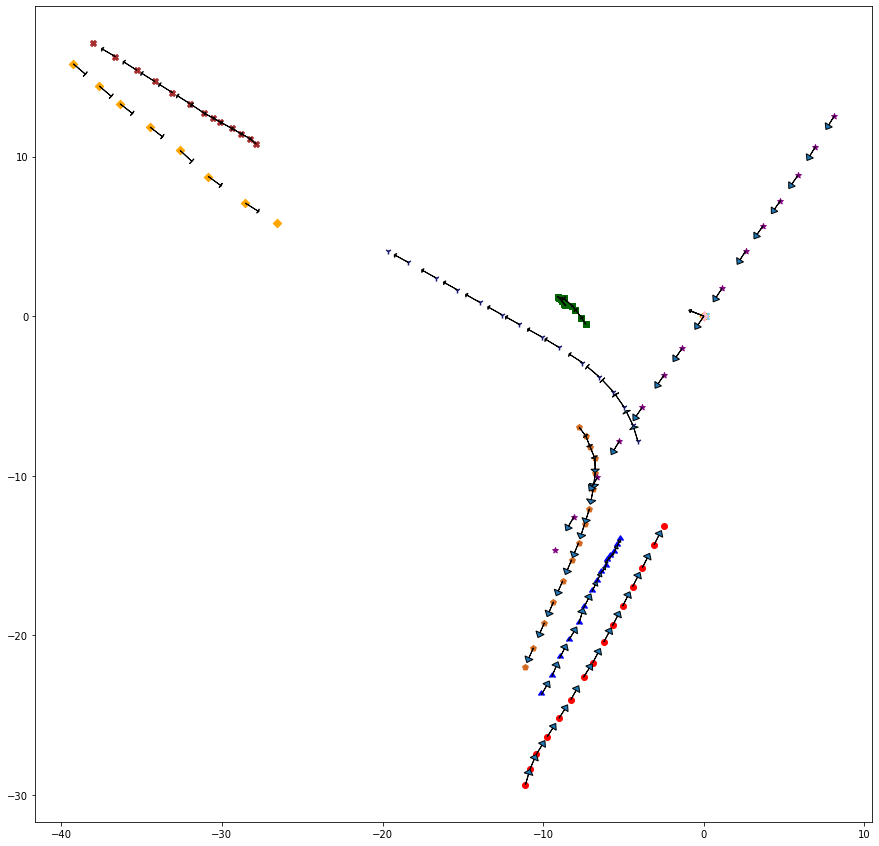

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
plot_multiple_trajs(full_trajs, axs)

In [237]:
k = np.random.choice(len(agents_trajs))
inp, inp_mask, tar, tar_mask = agents_trajs[k]
tar, tar_mask = tar[1: ], tar_mask[1: ]
inp_pos = np.argmax((inp_mask == 1)) 
tar_pos = np.argmax((tar_mask == 1))

tar_pos = len(tar) if tar_mask[tar_pos] == 0 else tar_pos 
traj = np.row_stack((inp[:inp_pos, :], tar[:tar_pos, :]))

In [236]:
traj[:, :2]

array([[-30.87785376,  23.61352854],
       [-30.80585376,  23.61152854],
       [-30.73485376,  23.60952854],
       [-30.66285376,  23.60752854],
       [-30.60485376,  23.60652854],
       [-30.53285376,  23.60452854],
       [-30.61985376,  23.60752854],
       [-30.70685376,  23.61052854],
       [-30.77885376,  23.61252854],
       [-30.55085376,  23.60452854],
       [-30.32185376,  23.59752854],
       [-30.09385376,  23.58952854],
       [-29.29885376,  23.56152854],
       [-28.50485376,  23.53252854],
       [-27.71085376,  23.50452854]])

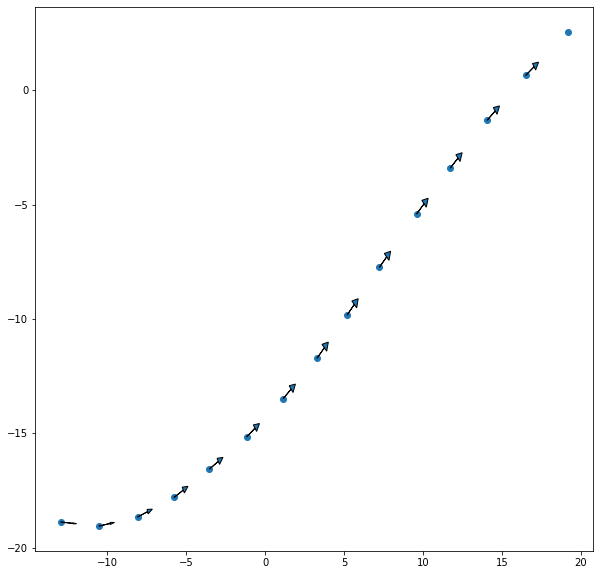

In [238]:
plot_traj(traj)

In [24]:
def argsort(x):
    index  = [i for i, _ in enumerate(x)]
    return sorted(index, key= lambda v:x[v])

In [26]:
argsort([0, 2, 1, 4, -5])

[4, 0, 2, 1, 3]